In [1]:
from datasets import load_dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
data = {}
data["wnlg_wd"] = load_dataset("csv", data_files="../raw_data/configurations_webnlg_wikidata.csv", split="train")
data["wnlg_db"] = load_dataset("csv", data_files="../raw_data/configurations_webnlg_dbpedia.csv", split="train")
data["wchunks"] = load_dataset("csv", data_files="../raw_data/configurations_wikichunks.csv", split="train")

Using custom data configuration default-18600fa1c7763f6f
Reusing dataset csv (/home/teven/.cache/huggingface/datasets/csv/default-18600fa1c7763f6f/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108)
Using custom data configuration default-b1a231f281ae5474
Reusing dataset csv (/home/teven/.cache/huggingface/datasets/csv/default-b1a231f281ae5474/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108)
Using custom data configuration default-7e1f153b40ad1ec1
Reusing dataset csv (/home/teven/.cache/huggingface/datasets/csv/default-7e1f153b40ad1ec1/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108)


In [12]:
for key in data.keys():
    data[key] = data[key].map(None, remove_columns=[column_name for column_name in data[key].column_names if "_step" in column_name or "MIN" in column_name or "MAX" in column_name])

Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/csv/default-18600fa1c7763f6f/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108/cache-d02a62feb8f3fcdb.arrow
Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/csv/default-b1a231f281ae5474/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108/cache-047dd74cff69359f.arrow
Loading cached processed dataset at /home/teven/.cache/huggingface/datasets/csv/default-7e1f153b40ad1ec1/0.0.0/50d3f5d1aef1732094f95566e0c67506165deea4ff693f78b1a17588fb6bc108/cache-6c7d59cb65a2ad81.arrow


In [14]:
data["wchunks"]

Dataset({
    features: ['Step', 'trex_bs192_replaceneg - MPWW_simplified_recall@1', 'tekgen_bs192_replaceneg - MPWW_simplified_recall@1', 'kelm_bs192_replaceneg - MPWW_simplified_recall@1', 'all_bs192_replaceneg - MPWW_simplified_recall@1', 'trex_bs320_batchneg - MPWW_simplified_recall@1', 'tekgen_bs320_batchneg - MPWW_simplified_recall@1', 'kelm_bs320_batchneg - MPWW_simplified_recall@1', 'all_bs320_batchneg - MPWW_simplified_recall@1', 'trex_bs2560_replaceneg - MPWW_simplified_recall@1', 'tekgen_bs2560_replaceneg - MPWW_simplified_recall@1', 'kelm_bs2560_replaceneg - MPWW_simplified_recall@1', 'all_bs2560_replaceneg - MPWW_simplified_recall@1', 'baseline - MPWW_simplified_recall@1'],
    num_rows: 1
})

In [6]:
models = [model_name.split()[0] for model_name in data["wnlg_wd"].column_names[1:]]

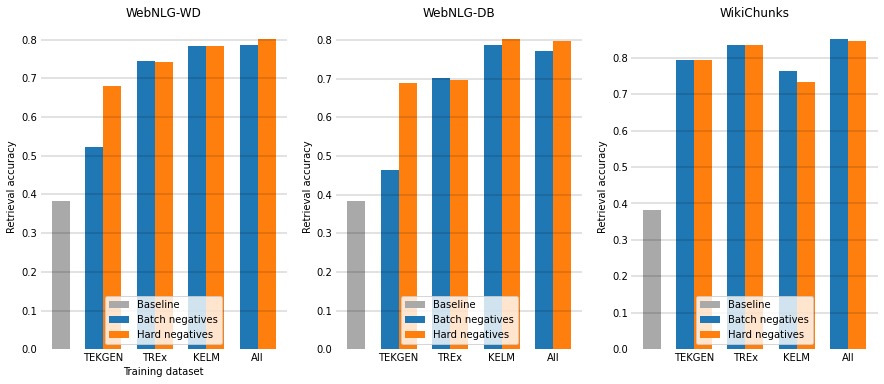

In [40]:
def format_axes(ax):
    ax.set_ylabel('Retrieval accuracy')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(["TEKGEN", "TREx", "KELM", "All"])
    ax.legend(loc="lower center")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)   
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)      
    yticks = ax.get_yticks()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    for y_pos in yticks[1:-1]:
        ax.axhline(y_pos, color="black", alpha=0.15)
    

fig, (wnlg_wd, wnlg_db, wchunks) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

names = ["tekgen", "trex", "kelm", "all"]
index = np.arange(1, 5)
bar_width = 0.35

baseline = wnlg_wd.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wnlg_wd.bar(index, [data["wnlg_wd"][f"{name}_bs320_batchneg - WebNLG_recall@1"][0] for name in names], 
                     bar_width,
                label="Batch negatives")

hard = wnlg_wd.bar(index+bar_width, [data["wnlg_wd"][f"{name}_bs192_replaceneg - WebNLG_recall@1"][0] for name in names], 
                     bar_width,
                label="Hard negatives")

wnlg_wd.set_xlabel('Training dataset')
wnlg_wd.set_title('WebNLG-WD')
format_axes(wnlg_wd)

baseline = wnlg_db.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wnlg_db.bar(index, [data["wnlg_db"][f"{name}_bs320_batchneg - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width,
                label="Batch negatives")

hard = wnlg_db.bar(index+bar_width, [data["wnlg_db"][f"{name}_bs192_replaceneg - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width,
                label="Hard negatives")

wnlg_wd.set_xlabel('Training dataset')
wnlg_db.set_title('WebNLG-DB')
format_axes(wnlg_db)

baseline = wchunks.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wchunks.bar(index, [data["wchunks"][f"{name}_bs320_batchneg - MPWW_simplified_recall@1"][0] for name in names], 
                     bar_width,
                label="Batch negatives")

hard = wchunks.bar(index+bar_width, [data["wchunks"][f"{name}_bs192_replaceneg - MPWW_simplified_recall@1"][0] for name in names], 
                     bar_width,
                label="Hard negatives")

wnlg_wd.set_xlabel('Training dataset')
wchunks.set_title('WikiChunks')
format_axes(wchunks)

Text(0.5, 1.0, 'WikiChunks')

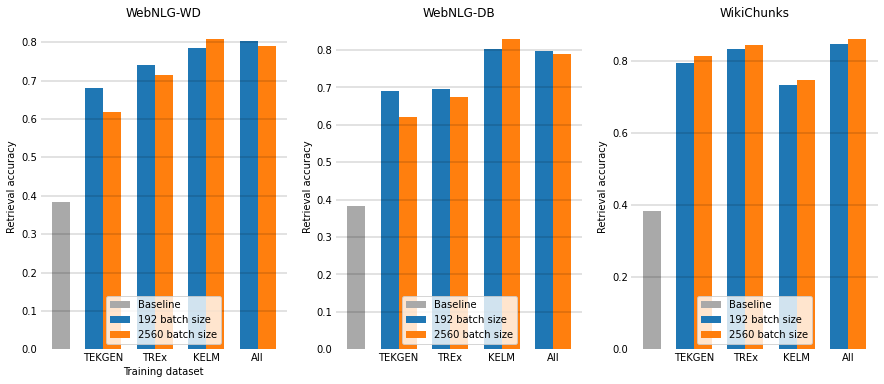

In [43]:
fig, (wnlg_wd, wnlg_db, wchunks) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

names = ["tekgen", "trex", "kelm", "all"]
index = np.arange(1, 5)
bar_width = 0.35

baseline = wnlg_wd.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wnlg_wd.bar(index, [data["wnlg_wd"][f"{name}_bs192_replaceneg - WebNLG_recall@1"][0] for name in names], 
                     bar_width,
                label="192 batch size")

hard = wnlg_wd.bar(index+bar_width, [data["wnlg_wd"][f"{name}_bs2560_replaceneg - WebNLG_recall@1"][0] for name in names], 
                     bar_width,
                label="2560 batch size")

wnlg_wd.set_xlabel('Training dataset')
wnlg_wd.set_title('WebNLG-WD')
format_axes(wnlg_wd)

baseline = wnlg_db.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wnlg_db.bar(index, [data["wnlg_db"][f"{name}_bs192_replaceneg - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width,
                label="192 batch size")

hard = wnlg_db.bar(index+bar_width, [data["wnlg_db"][f"{name}_bs2560_replaceneg - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width,
                label="2560 batch size")

wnlg_wd.set_xlabel('Training dataset')
wnlg_db.set_title('WebNLG-DB')
format_axes(wnlg_db)

baseline = wchunks.bar(bar_width, [data["wnlg_db"][f"baseline - WebNLG-DB_recall@1"][0] for name in names], 
                     bar_width, color="darkgrey",
                label="Baseline")

batch = wchunks.bar(index, [data["wchunks"][f"{name}_bs192_replaceneg - MPWW_simplified_recall@1"][0] for name in names], 
                     bar_width,
                label="192 batch size")

hard = wchunks.bar(index+bar_width, [data["wchunks"][f"{name}_bs2560_replaceneg - MPWW_simplified_recall@1"][0] for name in names], 
                     bar_width,
                label="2560 batch size")

wnlg_wd.set_xlabel('Training dataset')
format_axes(wchunks)
wchunks.set_title('WikiChunks')